---
# **CIFAR-10 with Fast.AI**

<img src="http://www.evanmarie.com/content/files/notebooks/cifar-10" width=800>

<br>

### I will be testing Resnet-18, Resnet-34, Resnet-50, and Resnet-101 to see which achieves the highest accuracy rate.

In [ ]:
#@title Importing libraries: { display-mode: "form" }
%%capture
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
!pip install nbdev
from fastbook import *
from fastai.vision.widgets import *
import nbdev
from fastai.vision import *
from pathlib import Path
import PIL

## Downloading the data:

In [ ]:
path = untar_data(URLs.CIFAR)

## Creating data loader template and dataloaders:

In [ ]:
data = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                    get_items=get_image_files,
                    get_y=parent_label,
                    item_tfms=Resize(40))

In [ ]:
dls = data.dataloaders(path, bs=64, valid_pct=0.2, seed=42,)

## A sample from a batch of data:

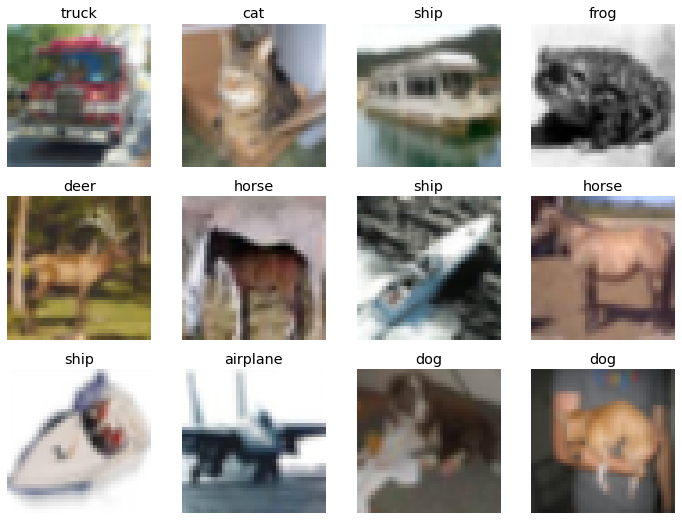

In [ ]:
dls.valid.show_batch(max_n=12, nrows=3)

## Resnet 18 at 10 Epochs Fine-Tuning = 84.383% Accuracy

In [ ]:
learner = vision_learner(dls, resnet18, metrics=accuracy)
learner.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.472317,1.232714,0.566333,01:43


epoch,train_loss,valid_loss,accuracy,time
0,0.842011,0.722360,0.747667,01:45
1,0.633202,0.591567,0.792917,01:46
2,0.468094,0.550876,0.816667,01:43
3,0.314972,0.568797,0.820917,01:43
4,0.204026,0.605627,0.822833,01:45
5,0.101965,0.703413,0.828167,01:44
6,0.058138,0.756287,0.836417,01:46
7,0.026338,0.784674,0.841167,01:54
8,0.014206,0.801107,0.843083,01:46
9,0.011724,0.784389,0.843833,01:51


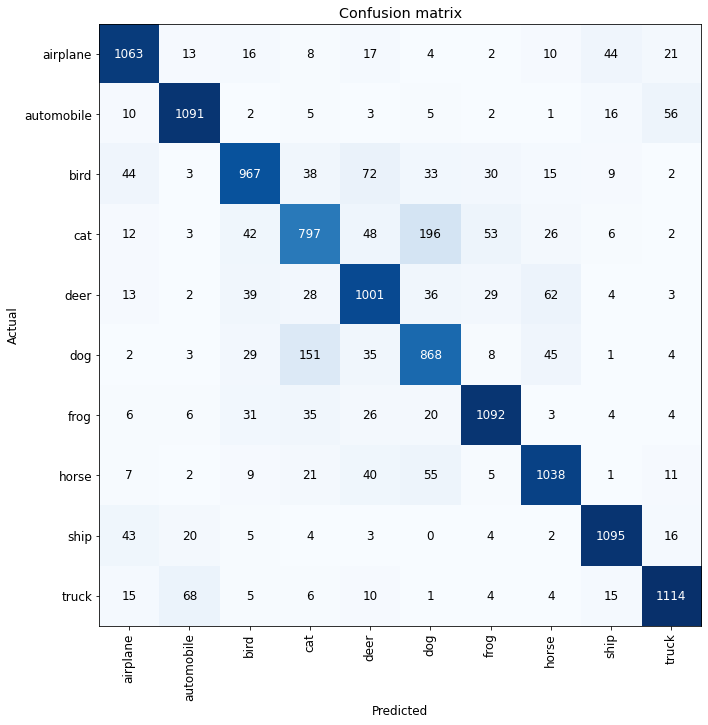

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(13,10))

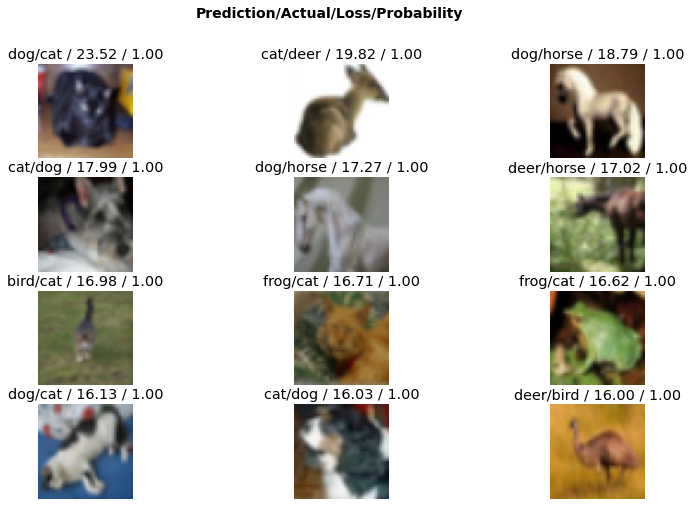

In [ ]:
interp.plot_top_losses(12, nrows=4, figsize=(13, 8))

In [ ]:
learner.export('cifa10.pkl')

## Resnet 34 at 10 Epochs Fine-Tuning = 86.550% Accuracy

In [ ]:
learner_02 = vision_learner(dls, resnet34, metrics=accuracy)
learner_02.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.411850,1.182370,0.586000,01:46


epoch,train_loss,valid_loss,accuracy,time
0,0.766950,0.648028,0.772917,01:56
1,0.612506,0.546431,0.811417,01:54
2,0.480985,0.508704,0.828083,02:03
3,0.317945,0.503057,0.842000,01:54
4,0.213955,0.559850,0.839667,01:57
5,0.100588,0.573819,0.855167,01:53
6,0.057183,0.632762,0.858083,02:12
7,0.025825,0.673465,0.862500,02:09
8,0.009358,0.691684,0.864750,02:06
9,0.007952,0.691939,0.865500,01:54


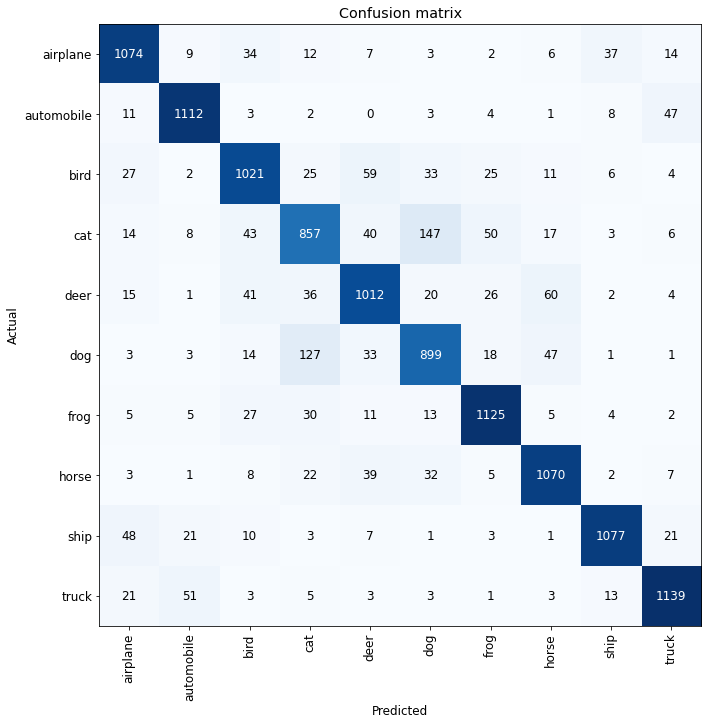

In [ ]:
interp_02 = ClassificationInterpretation.from_learner(learner_02)
interp_02.plot_confusion_matrix(figsize=(13,10))

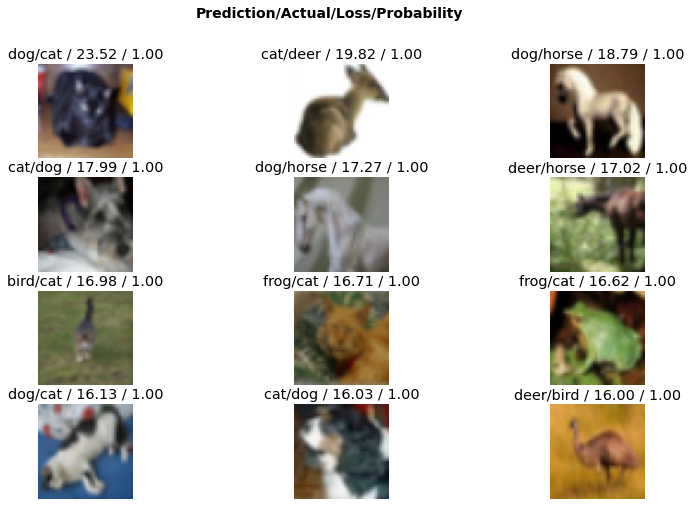

In [ ]:
interp_02.plot_top_losses(12, nrows=4, figsize=(13, 8))

## Resnet 50 at 10 Epochs Fine-Tuning = 88.66% Accuracy

In [ ]:
learner_03 = vision_learner(dls, resnet50, metrics=accuracy)
learner_03.fine_tune(10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.205059,1.041292,0.632250,01:59


epoch,train_loss,valid_loss,accuracy,time
0,0.653320,0.564812,0.806417,02:06
1,0.495060,0.481571,0.837083,02:17
2,0.390935,0.443213,0.852583,02:06
3,0.248837,0.431290,0.866083,02:08
4,0.142625,0.475309,0.866750,02:05
5,0.077078,0.511285,0.873667,02:07
6,0.036903,0.533306,0.877250,02:05
7,0.018022,0.566039,0.882750,02:33
8,0.005686,0.565933,0.885417,02:09
9,0.003111,0.565176,0.886667,02:07


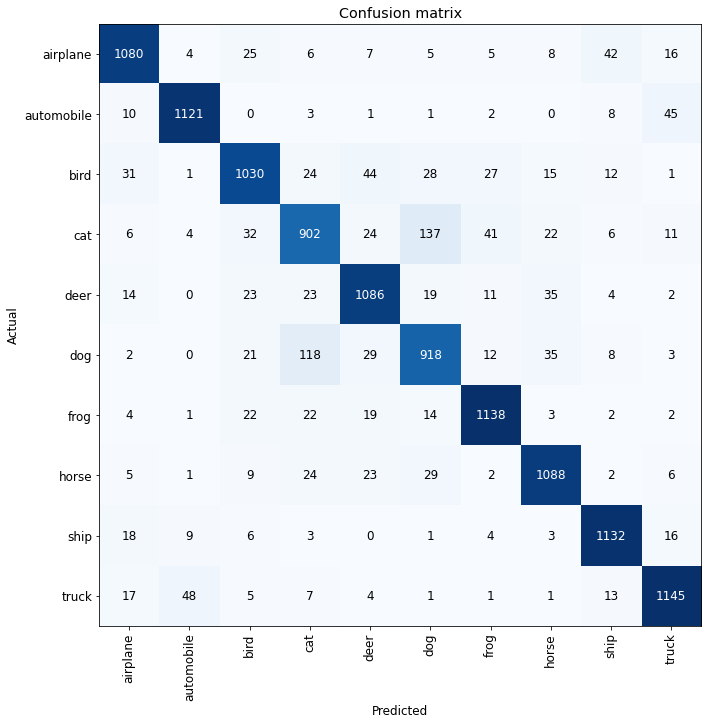

In [ ]:
interp_03 = ClassificationInterpretation.from_learner(learner_03)
interp_03.plot_confusion_matrix(figsize=(13,10))

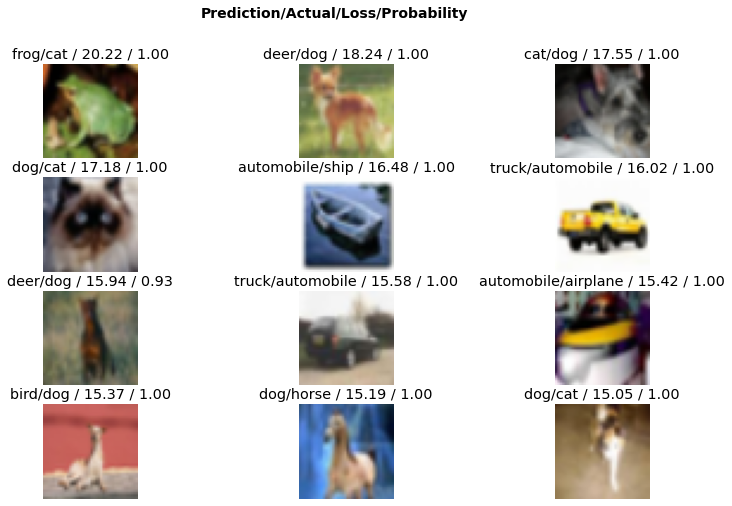

In [ ]:
interp_03.plot_top_losses(12, nrows=4, figsize=(13,8))

## Resnet 101 at 10 Epochs Fine-Tuning = 88.56% Accuracy

In [ ]:
learner_04 = vision_learner(dls, resnet101, metrics=accuracy)
learner_04.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.220927,1.092899,0.631833,02:25


epoch,train_loss,valid_loss,accuracy,time
0,0.639362,0.546965,0.817417,02:41
1,0.496177,0.448836,0.849917,02:44
2,0.373233,0.455511,0.850500,02:44
3,0.258124,0.434633,0.865333,02:42
4,0.133361,0.460183,0.868667,02:45
5,0.075085,0.510177,0.869083,02:46
6,0.031337,0.546061,0.876750,02:55
7,0.011680,0.576767,0.883667,02:51
8,0.005295,0.587328,0.884000,02:45
9,0.003234,0.587700,0.885667,02:45


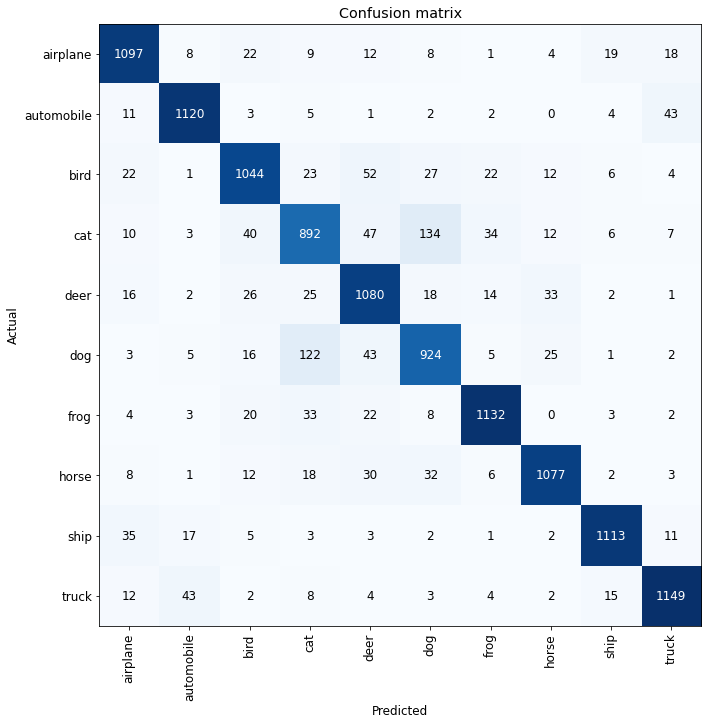

In [ ]:
interp_04 = ClassificationInterpretation.from_learner(learner_04)
interp_04.plot_confusion_matrix(figsize=(13, 10))

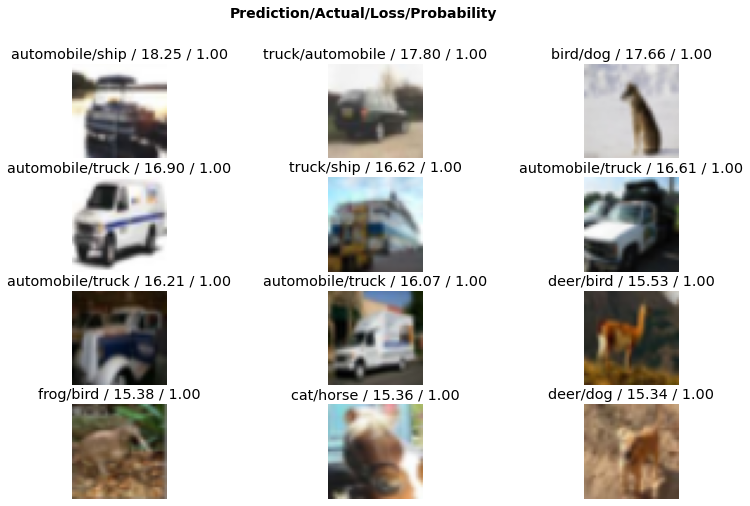

In [ ]:
interp_04.plot_top_losses(12, nrows=4, figsize=(13,8))

horse


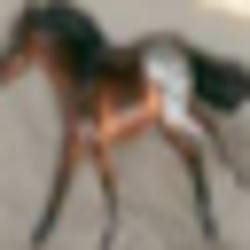

In [ ]:
image_01 = get_image_files(path)[3333]
print(learner_03.predict(image_01)[0])
img = PIL.Image.open(image_01)
new_size=(250,250)
img = img.resize(new_size)
img

truck


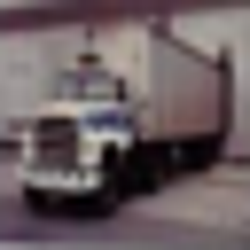

In [ ]:
image_02 = get_image_files(path)[2222]
print(learner_03.predict(image_02)[0])
img = PIL.Image.open(image_02)
new_size=(250,250)
img = img.resize(new_size)
img

automobile


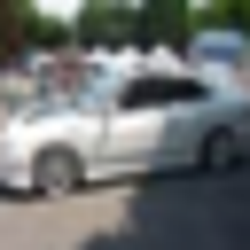

In [ ]:
image_03 = get_image_files(path)[5555]
print(learner_03.predict(image_03)[0])
img = PIL.Image.open(image_03)
new_size=(250,250)
img = img.resize(new_size)
img

ship


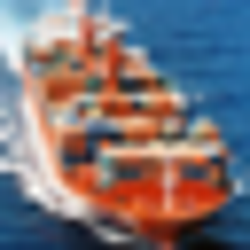

In [ ]:
image_04 = get_image_files(path)[7777]
print(learner_03.predict(image_04)[0])
img = PIL.Image.open(image_04)
new_size=(250,250)
img = img.resize(new_size)
img

airplane


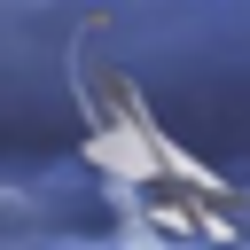

In [ ]:
image_05 = get_image_files(path)[8888]
print(learner_03.predict(image_05)[0])
img = PIL.Image.open(image_05)
new_size=(250,250)
img = img.resize(new_size)
img

### Exporting and Downloading the best model:

In [ ]:
# Resnet-50 wins with 88.66% accuracy
learner_03.export('cifar-10-resnet-50.pkl')